# A4 - Baseline Modeling

#### Throughout the exercise, there are blanks you will need to fill in, these blanks are highlighted with three dashes `---` or an empty cell

In the workshop session we covered three different featurization approaches but didn't build any baseline models. This assignment is your chance to try a few baseline modeling approaches, you'll be able to leverage these for comparison when you come to your final project.

The assignment will be split into:
1. Build a random predictor
2. Build a majority class predictors
3. Build a KNN model

These models are slowly increasing in complexity and likelihood of having reasonable predictions.


## Imports

In [1]:
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, neighbors

In [3]:
seed = 13 # DON'T CHANGE

## Load Required Data

In [2]:
train_pa_df = pd.read_csv('../data/train_test_data/train_pa_genes.csv')

In [4]:
def load_data():
    """
    Load the data needed for Assignment 4
    """
    train_pa_df = pd.read_csv('../data/train_test_data/train_pa_genes.csv')
    train_pa_df = train_pa_df.set_index('genome_id')

    y_train = np.load('../data/train_test_data/y_train.npy', allow_pickle=True)
    y_train_ids = np.load('../data/train_test_data/train_ids.npy', allow_pickle=True).astype(str)
    
    return train_pa_df, y_train, y_train_ids

train_pa_df, y_train, y_train_ids = load_data()


In [5]:
train_pa_df.head()

,gb|U00096.3|-|3324062-3324911|ARO:3003386|Ecol_folP_SLF,gb|AP009048.1|+|3760295-3762710|ARO:3003303|Ecol_gyrB_AMU,gb|BA000007.3|+|4990267-4994296|ARO:3003288|Ecol_rpoB_RIF,gb|AH002539.2|+|1760-2945|ARO:3003368|Ecol_EFTu_KIR,gb|AE014075.1|-|3901532-3902762|ARO:3003369|Ecol_EFTu_PLV,gb|U00096.3|-|2336792-2339420|ARO:3003294|Ecol_gyrA_FLO,gb|AE006468.2|-|4038867-4041282|ARO:3003307|Sser_gyrB_FLO,gb|HG738867.1|+|2934266-2935658|ARO:3003890|Ecol_UhpT_FOF,gb|HG738867.1|-|2233288-2234647|ARO:3003889|Ecol_GlpT_FOF,gb|HG738867.1|+|2930707-2931298|ARO:3003893|Ecol_uhpA_FOF,...,gb|X01702.1|+|484-1285|ARO:3002659|APH(6)-Ic,gb|JX259319.1|+|0-681|ARO:3002771|QnrB58,gb|EU675686.2|+|3196-4042|ARO:3002616|aadA16,gb|HQ418999.2|+|0-681|ARO:3002746|QnrB31,gb|JX423831.1|+|2676-3474|ARO:3001778|OXA-232,gb|AY536519.1|+|37-937|ARO:3002372|VEB-3,gb|KJ158441.1|+|2732-3377|ARO:3002789|QnrD2,gb|KF526113.1|+|0-1146|ARO:3002112|CMY-100,gb|X03988.1|+|382-1642|ARO:3000363|EreB,gb|AJ310778.1|+|7003-7573|ARO:3003015|dfrA19
genome_id,,,,,,,,,,,,,,,,,,,,,
562.22444,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562.42705,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562.42733,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562.42728,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562.45644,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y_train[0:5]

array([['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S']], dtype=object)

In [7]:
# Preprocess X and y data
X_train = np.array(train_pa_df) # Convert X to numpy array
y_train = y_train.reshape(-1)   # Flatten Y from column matrix to vector

## 1. Build a Random Predictor

Build a simple model (as a function) which randomly predicts the output class

In [8]:
def random_predictor(X_train):
    """
    Random predictor model - generate random predictions for each input sample

    Inputs:
      - X_train (np.array): feature data

    Outputs:
      - y_pred (np.array): predictions array
    """
    # Add your code here
    sample_count = X_train.shape[0]
    options = ['S', 'R']

    y_pred = np.random.choice(options, size=sample_count)
    
    return y_pred

#### Q1. Run this random predictor across the training data 100 times, what is the average accuracy on the training dataset?

In [15]:
# Add your code here
random_accuracies = []

for _ in range(100):
    y_pred = random_predictor(X_train)
    majority_accuracy = np.mean(y_train == y_pred)
    random_accuracies.append(majority_accuracy)

average_acc = np.mean(random_accuracies)
print(average_acc)

0.49901069518716584


Average accuracy is ~50%, as expected

## 2. Build a Majority Class Predictor

This time build a similar function but always predict the majority class
  
- Make sure to get the majority class from the data rather than assume
- Check the imports for a useful function

In [23]:
def majority_predictor(X_train, y_train):
    """
    Majority predictor model - generate predictions for the majority class

    Inputs:
      - X_train (np.array): feature data
      - y_train (np.array): target data

    Outputs:
      - y_pred (np.array): predictions array
    """
    # Add your code here
    # Count occurrences
    counts = Counter(y_train)

    # Get majority class from tuple
    majority = counts.most_common(1)[0][0]

    # Number of samples
    sample_count = X_train.shape[0]

    # Predict the majority for all
    y_pred = np.full(shape=sample_count, fill_value=majority)

    return y_pred

#### Q2. Run this majority predictor once, what accuracy is achieved on the training dataset?

In [24]:
# Add your code here
y_pred = majority_predictor(X_train, y_train)
majority_accuracy = np.mean(y_train == y_pred)
print(majority_accuracy)

0.7994652406417112


~80%

## 3. Build a KNN Model

[Useful documentation for KNN models](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Build a simple KNN classifier:
- As we're training a model we need to split out some data for testing
- Lets try a few different values of K for n-neighbors

In [28]:
# Randomly select some IDs
idx_all = np.arange(X_train.shape[0])
val_ids = np.random.choice(idx_all, 100, replace=False)
train_ids = idx_all[~np.isin(idx_all, val_ids)]

# Subset data into train/validate
y_train_knn = y_train[train_ids]
X_train_knn = X_train[train_ids]

y_val_knn = y_train[val_ids]
X_val_knn = X_train[val_ids]

#### For every K from 1 to 50: train a KNN Classifier and calculate accuracy on validate
- Fit on train
- Predict on validation
- Calculate accuracy

In [29]:
# Add your code here
knn_accuracies = []

for k in range(1, 51):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)

    y_pred = knn.predict(X_val_knn)
    accuracy = metrics.accuracy_score(y_val_knn, y_pred)

    knn_accuracies.append(accuracy)

for k, accuracy in enumerate(knn_accuracies, start=1):
    print(f"K={k}: Accuracy = {accuracy:.4f}")


K=1: Accuracy = 0.8000
K=2: Accuracy = 0.8400
K=3: Accuracy = 0.8600
K=4: Accuracy = 0.8400
K=5: Accuracy = 0.8500
K=6: Accuracy = 0.8400
K=7: Accuracy = 0.8500
K=8: Accuracy = 0.8300
K=9: Accuracy = 0.8600
K=10: Accuracy = 0.8400
K=11: Accuracy = 0.8400
K=12: Accuracy = 0.8500
K=13: Accuracy = 0.8500
K=14: Accuracy = 0.8500
K=15: Accuracy = 0.8400
K=16: Accuracy = 0.8600
K=17: Accuracy = 0.8600
K=18: Accuracy = 0.8600
K=19: Accuracy = 0.8300
K=20: Accuracy = 0.8400
K=21: Accuracy = 0.8400
K=22: Accuracy = 0.8500
K=23: Accuracy = 0.8200
K=24: Accuracy = 0.8400
K=25: Accuracy = 0.8200
K=26: Accuracy = 0.8200
K=27: Accuracy = 0.8100
K=28: Accuracy = 0.8100
K=29: Accuracy = 0.8100
K=30: Accuracy = 0.8000
K=31: Accuracy = 0.8000
K=32: Accuracy = 0.8000
K=33: Accuracy = 0.7900
K=34: Accuracy = 0.7900
K=35: Accuracy = 0.7900
K=36: Accuracy = 0.7900
K=37: Accuracy = 0.7900
K=38: Accuracy = 0.7900
K=39: Accuracy = 0.7900
K=40: Accuracy = 0.7900
K=41: Accuracy = 0.7800
K=42: Accuracy = 0.7700
K

#### Plot the validation accuracy as a function of K
- X axis = K
- Y axis = accuracy
- Rememeber to clearly label your plot

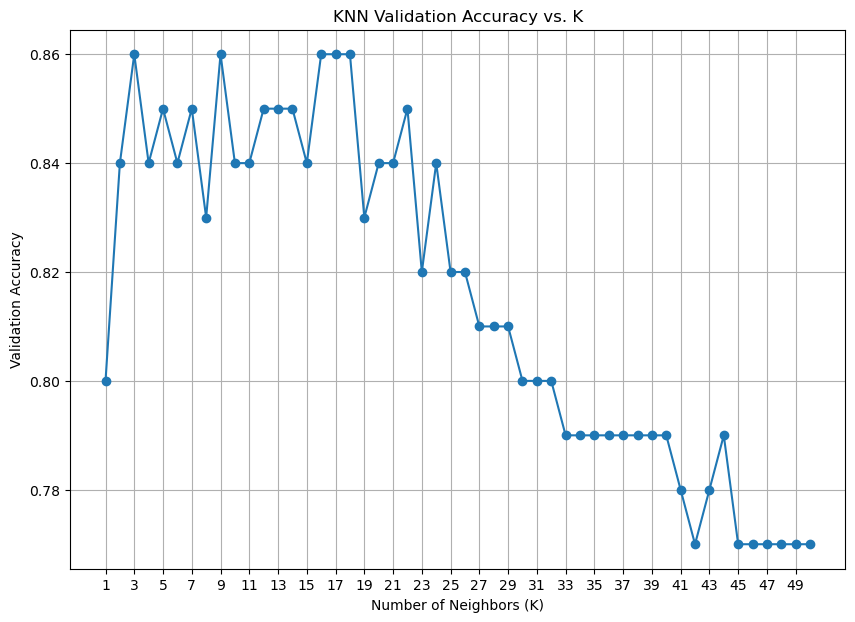

In [48]:
# Add your code here
plt.figure(figsize=(10, 7))
plt.plot(range(1, 51), knn_accuracies, marker='o')
plt.title('KNN Validation Accuracy vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Validation Accuracy')
plt.xticks(range(1, 51, 2))
plt.grid(True)
plt.show()

#### Q3. Comment on the plot above, how does this compare to the random and majority models?

It meaningfully outperforms both. 15-18 Strike me as the most trustworthy range, as it performs consistently well and should (?) be free of over/underfitting there.